In [118]:
#module to mount the google drive
from google.colab import drive
drive.mount('/content/mydrive')

Drive already mounted at /content/mydrive; to attempt to forcibly remount, call drive.mount("/content/mydrive", force_remount=True).


In [119]:
"""Importing necessary libraries"""

import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from keras.layers import Dropout


In [120]:
"""loading the training and testing dataset"""
train_dataset='/content/mydrive/MyDrive/MNIST_DATASET/mnist_train.csv'
test_dataset='/content/mydrive/MyDrive/MNIST_DATASET/mnist_test.csv'

In [121]:
"""Converting into pandas dataframe"""
train_data=pd.read_csv(train_dataset)

In [ ]:
train_data

In [123]:
train_data.describe()


,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
count,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.00000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0,60000.0,60000.0,60000.0,60000.0,60000.0,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.0000,60000.0,60000.0,60000.0,60000.0
mean,4.453933,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.002100,0.007833,0.003600,0.000150,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000267,0.000917,0.009283,0.024283,0.043717,0.06410,0.120133,...,3.534933,2.591817,1.701167,1.008600,0.540283,0.238400,0.075267,0.016167,0.000517,0.000983,0.0,0.0,0.0,0.0,0.0,0.0,0.002533,0.015583,0.041633,0.089200,0.128217,0.196733,0.336017,0.429967,0.525983,0.590683,0.688033,0.592067,0.482733,0.343517,0.200433,0.088867,0.045633,0.019283,0.015117,0.0020,0.0,0.0,0.0,0.0
std,2.889270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.475324,1.361189,0.881816,0.036742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065320,0.194636,1.055011,2.095113,2.962063,3.32388,4.869298,...,26.101169,22.251302,18.107058,13.897102,10.317854,6.552565,3.500306,1.241759,0.114964,0.240866,0.0,0.0,0.0,0.0,0.0,0.0,0.437527,1.721198,2.601220,4.032627,4.776047,6.177880,7.680724,9.093559,9.898373,10.431982,11.403013,10.517303,9.397896,8.057733,6.042472,3.956189,2.839845,1.686770,1.678283,0.3466,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [124]:
train_data.columns

Index(['label', '1x1', '1x2', '1x3', '1x4', '1x5', '1x6', '1x7', '1x8', '1x9',
       ...
       '28x19', '28x20', '28x21', '28x22', '28x23', '28x24', '28x25', '28x26',
       '28x27', '28x28'],
      dtype='object', length=785)

In [125]:
X_train=train_data.copy()

In [126]:
"""Target variable"""
y_train=X_train['label']

In [127]:
y_train.shape

(60000,)

In [128]:
"""Droping the label variable  as it is a target variable"""
x_train=X_train.drop('label',axis=1,inplace=True)

In [129]:
X_train.shape

(60000, 784)

In [130]:
X_train.ndim

2

In [131]:
"""Data Normalisation  """
X_train=X_train/255.0

"""Converting data in 3 dimension"""
resh=[]
for i in range(len(X_train)):
   im=X_train.iloc[i]
   img=im.values.reshape(28,28)
   resh.append(img)


In [132]:
"""Converting into numpy array"""
image=np.array(resh)
image.shape


(60000, 28, 28)

In [133]:
image.ndim

3

In [134]:
"""Making 3d data into 4 d"""
x_train=np.expand_dims(image,-1)
x_train.shape

(60000, 28, 28, 1)

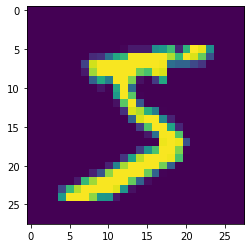

class 5


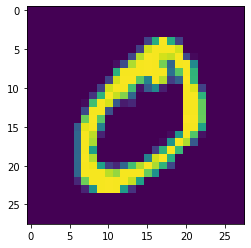

class 0


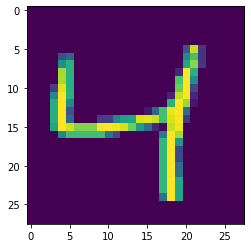

class 4


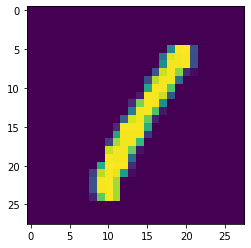

class 1


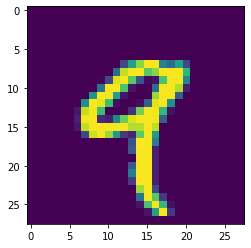

class 9


In [135]:
"""Displaying the first five class"""
for i  in  range(5):
   
  plt.imshow(image[i])
  plt.show()
  print('class',y_train.iloc[i])
 


In [136]:
"""converting the test dataset into pandas dataframe"""
test_data=pd.read_csv(test_dataset)
test_data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,1x11,1x12,1x13,1x14,1x15,1x16,1x17,1x18,1x19,1x20,1x21,1x22,1x23,1x24,1x25,1x26,1x27,1x28,2x1,2x2,2x3,2x4,2x5,2x6,2x7,2x8,2x9,2x10,2x11,...,27x17,27x18,27x19,27x20,27x21,27x22,27x23,27x24,27x25,27x26,27x27,27x28,28x1,28x2,28x3,28x4,28x5,28x6,28x7,28x8,28x9,28x10,28x11,28x12,28x13,28x14,28x15,28x16,28x17,28x18,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [137]:
X_test=test_data.copy()

In [138]:
y_test=X_test['label']

In [139]:
y_test

0       7
1       2
2       1
3       0
4       4
       ..
9995    2
9996    3
9997    4
9998    5
9999    6
Name: label, Length: 10000, dtype: int64

In [140]:
X_test.drop('label',axis=1,inplace=True)

In [141]:
X_test=X_test/255.0
shape=(28,28)
import cv2
resh_test=[]
for i in range(len(X_test)):
   im=X_test.iloc[i]
   img=im.values.reshape(28,28)
   resh_test.append(img)

In [142]:
img_test=np.array(resh_test)

In [143]:
img_test.shape

(10000, 28, 28)

In [144]:
x_test=np.expand_dims(img_test,-1)
x_test.shape

(10000, 28, 28, 1)

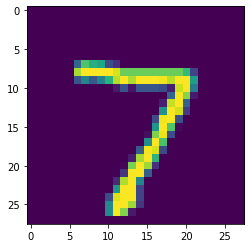

class 7


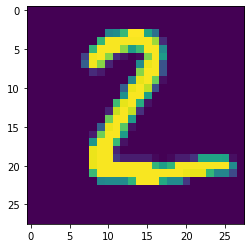

class 2


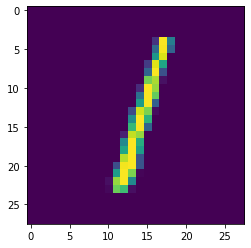

class 1


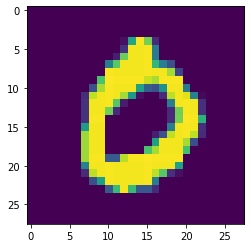

class 0


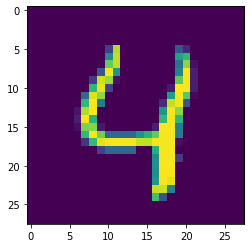

class 4


In [145]:
for i  in  range(5):
   
  im=plt.imshow(np.squeeze(x_test[i]))
  plt.show()
  print('class',y_test.iloc[i])
  

In [146]:
import tensorflow
from tensorflow.keras.utils import to_categorical #importing the cateogirical function to make the target class into vector
num_class=10
y_train=tensorflow.keras.utils.to_categorical(y_train)
y_test=tensorflow.keras.utils.to_categorical(y_test)
y_train.shape

(60000, 10)

In [147]:
from keras.models import Sequential#for creating our model
from keras.layers import Conv2D#for convolution layer and 2D is used for  processing the images
from keras.layers import MaxPooling2D###library for Pooling  
from keras.layers import Flatten#Flatten for converting the pooled Matrix into a vector
from keras.layers import Dense

In [148]:
mnist_model=Sequential()#Creating the Object of the Sequential Class

In [149]:
mnist_model.add(Conv2D(64,(3,3),padding='same',input_shape=(28,28,1),activation='relu'))

In [150]:
mnist_model.add(MaxPooling2D(pool_size=(2,2)))#pooling layer

In [151]:
mnist_model.add(Conv2D(64,(3,3),padding='same',input_shape=(28,28,1),activation='relu'))

In [152]:
mnist_model.add(MaxPooling2D(pool_size=(2,2)))#pooling layer

In [153]:
mnist_model.add(Conv2D(64,(3,3),padding='same',input_shape=(28,28,1),activation='relu'))

In [154]:
mnist_model.add(MaxPooling2D(pool_size=(2,2)))#pooling layer

In [155]:
mnist_model.add(Flatten())

In [156]:
mnist_model.add(Dense(100,activation='relu'))

In [157]:
mnist_model.add(Dense(10,activation='softmax'))

In [158]:

mnist_model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])


optimizer determines how the weight and bias are update and 

Loss function is used for evaluationg the error between the actual value and the predicted value

In [159]:
model=mnist_model.fit(x_train,y_train,batch_size=90,epochs=7)



Epoch 1/7
667/667 [==============================] - 115s 171ms/step - loss: 0.1915 - accuracy: 0.9394
Epoch 2/7
667/667 [==============================] - 113s 169ms/step - loss: 0.0479 - accuracy: 0.9851
Epoch 3/7
667/667 [==============================] - 113s 169ms/step - loss: 0.0327 - accuracy: 0.9898
Epoch 4/7
667/667 [==============================] - 115s 172ms/step - loss: 0.0242 - accuracy: 0.9923
Epoch 5/7
667/667 [==============================] - 113s 170ms/step - loss: 0.0197 - accuracy: 0.9937
Epoch 6/7
667/667 [==============================] - 112s 169ms/step - loss: 0.0156 - accuracy: 0.9949
Epoch 7/7
667/667 [==============================] - 112s 168ms/step - loss: 0.0129 - accuracy: 0.9958


In [160]:
mnist_model.evaluate(x_test,y_test)#testing the model

313/313 [==============================] - 5s 16ms/step - loss: 0.0265 - accuracy: 0.9920


[0.02646804228425026, 0.9919999837875366]

In [161]:
pred=np.argmax(mnist_model.predict(x_test),axis=-1)#predicting 

In [162]:
pred[0:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])

In [163]:
y_label=np.argmax(y_test,axis=-1)#actual label
print(y_label[0:10])



[7 2 1 0 4 1 4 9 5 9]


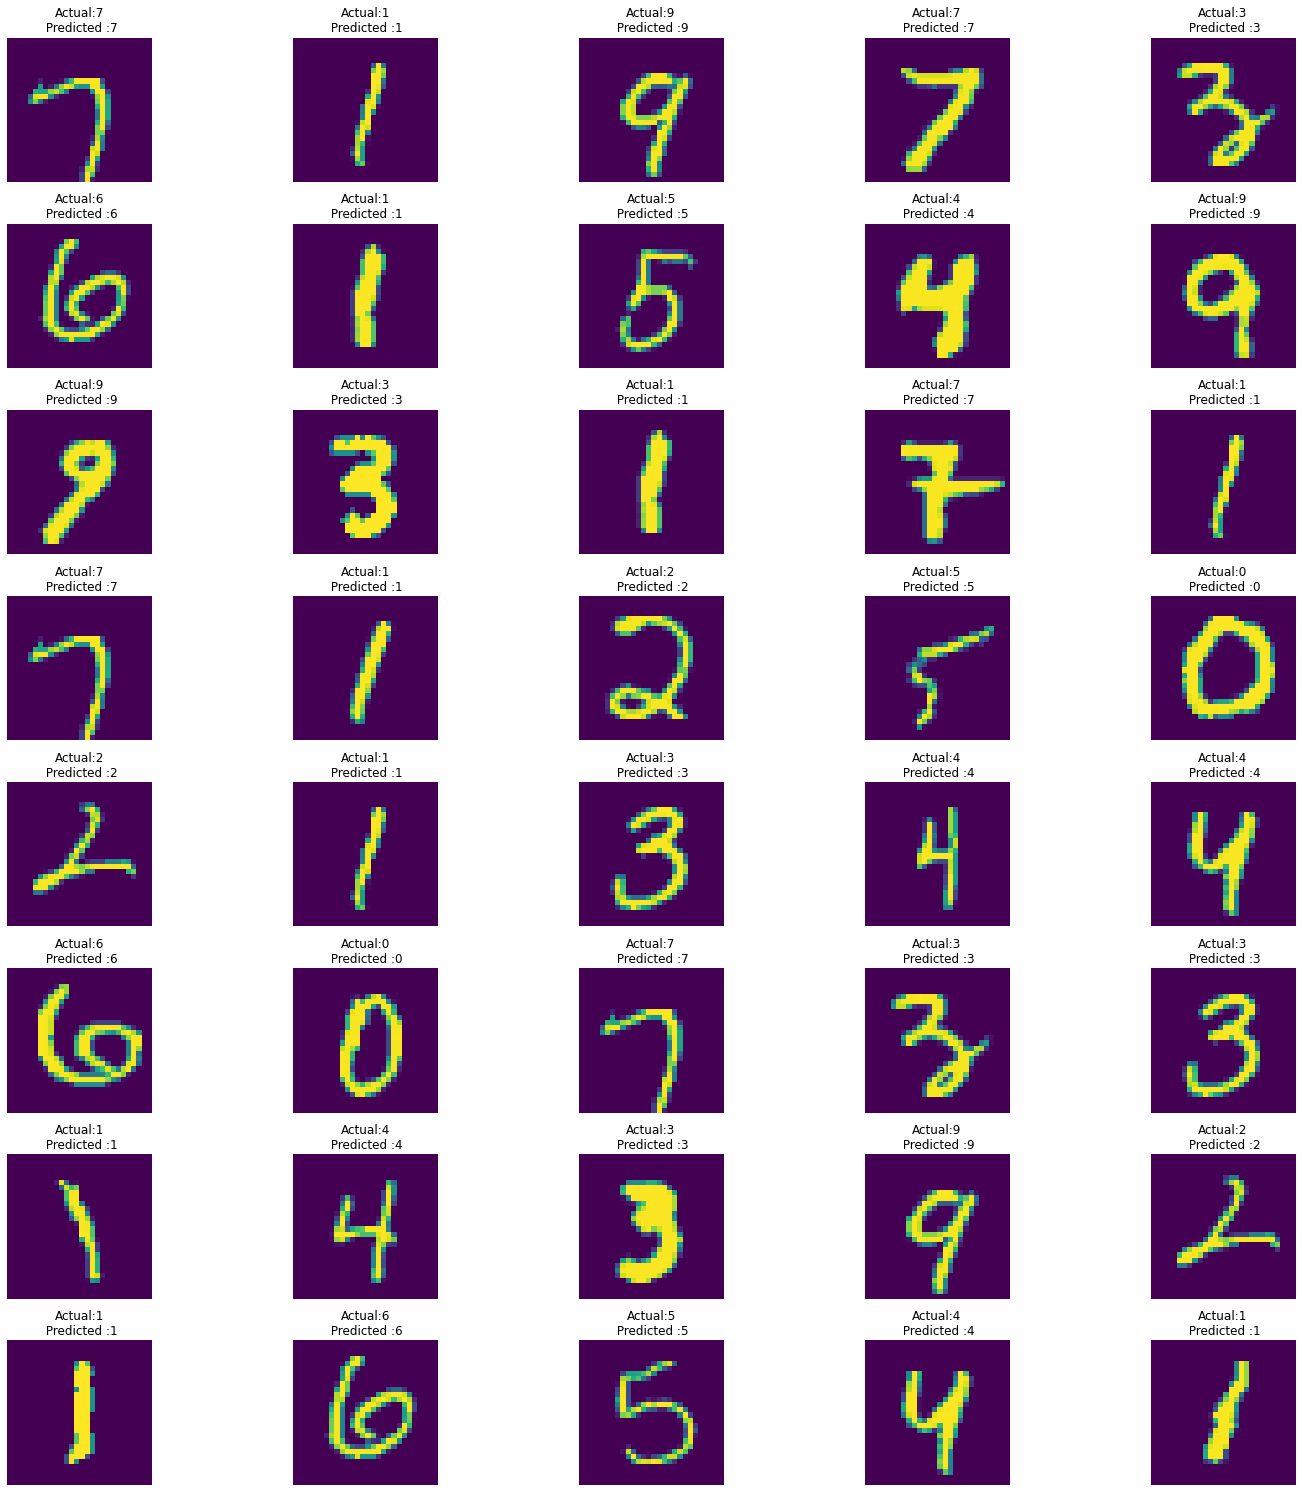

In [172]:
"""Displaying  20 predicted  images and actual label"""
plt.figure(figsize=(20,26))
k=1
for i in np.random.randint(1,100,40):
  plt.subplot(10,5,k)
  k=k+1
  plt.imshow(np.squeeze(x_test[i]))
  plt.title(f"Actual:{y_label[i]}\n Predicted :{pred[i]}")
  plt.tight_layout()
  plt.axis('off')
  


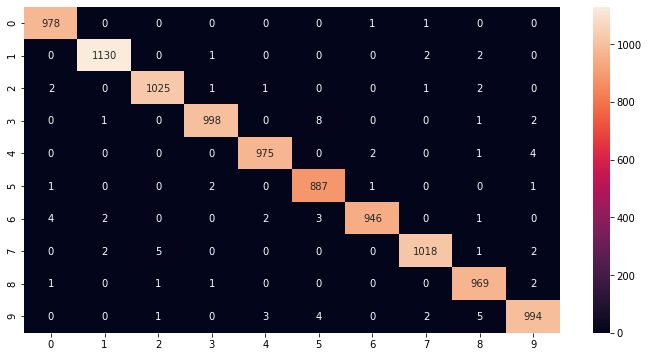

In [165]:

"""Confusion matrix"""
from sklearn.metrics import confusion_matrix

plt.figure(figsize=(12,6))
cf=confusion_matrix(y_label,pred)
import  seaborn as sns
sns.heatmap(cf,annot=True,fmt='d')
plt.show()


In [166]:
from sklearn.metrics import classification_report
class_rep=classification_report(y_label,pred)
print(class_rep)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       1.00      1.00      1.00      1135
           2       0.99      0.99      0.99      1032
           3       1.00      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       1.00      0.99      0.99       958
           7       0.99      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.99      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



In [167]:
print(model.history.keys())

dict_keys(['loss', 'accuracy'])


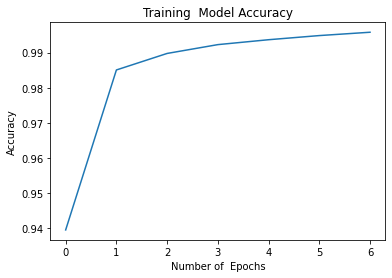

In [168]:
plt.plot(model.history['accuracy'])
plt.title("Training  Model Accuracy")
plt.xlabel("Number of  Epochs")
plt.ylabel("Accuracy")
plt.show()

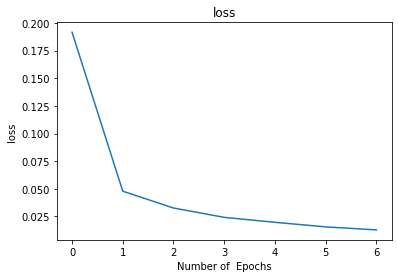

In [169]:
plt.plot(model.history['loss'])
plt.title("loss")
plt.xlabel("Number of  Epochs")
plt.ylabel("loss")
plt.show()